# ISO 11146 Beam Size Definitions

**Scott Prahl**

**Sept 2023**

A laser beam will usually consist of a superposition of several modes. A single mode beam radius is easily described by $1/e^2$ points.  This, of course, fails for any beam shape other than Gaussian.  ISO 11146 is intended to provide a simple, consistent way of describing the width of a beam.

This notebook summarizes the mathematical definitions.

In [1]:
import laserbeamsize as lbs

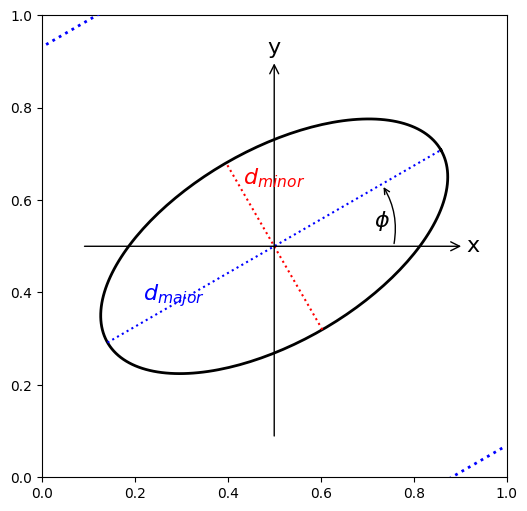

In [2]:
lbs.plot_beam_diagram()

The total power $P$ is obtained by integrating the irradiance $E(x,y)$ over the entire beam
$$
P = \int_{-\infty}^\infty \int_{-\infty}^\infty  E(x,y)\,dxdy
$$

### Center of beam
The center of the beam can be found by
$$
x_c = {1\over P} \int_{-\infty}^\infty \int_{-\infty}^\infty  x \cdot E(x,y)\,dxdy 
$$
and
$$
y_c = {1\over P} \int_{-\infty}^\infty \int_{-\infty}^\infty  y \cdot E(x,y)\,dxdy
$$

### Variance

A useful parameter characterizing a general two-dimensional distribution $E(x,y)$ is the variance in the $x$ and $y$ directions
$$
\sigma_x^2 = {1\over P} \int_{-\infty}^\infty \int_{-\infty}^\infty  (x-x_c)^2 E(x,y)\,dxdy
$$
and
$$
\sigma_y^2 = {1\over P} \int_{-\infty}^\infty \int_{-\infty}^\infty  (y-y_c)^2 E(x,y)\,dxdy
$$
and
$$
\sigma_{xy}^2 = {1\over P} \int_{-\infty}^\infty \int_{-\infty}^\infty  (x-x_c)(y-y_c) E(x,y)\,dxdy
$$

In general, $\sigma_x \ne \sigma_y$. For example, in semiconductor lasers the height and width of the emitting aperture differ. Such beams are called *astigmatic*. 

Now, the quantities $\sigma_x^2$ and $\sigma_y^2$ will always be positive, but $\sigma_{xy}^2$ can be negative, zero, or positive.

### Beam Radius and $D4\sigma$ or D4sigma
For a Gaussian distribution centered at (0,0) with $1/e^2$ radius $w$ we find
$$
\sigma_x^2 = \frac{\int_{-\infty}^\infty \int_{-\infty}^\infty  x^2 e^{-2(x^2+y^2)/w^2}\,dx\,dy}{
\int_{-\infty}^\infty \int_{-\infty}^\infty e^{-2(x^2+y^2)/w^2}\,dx\,dy}
=\frac{w^2}{4}
$$

This leads to the definition of the beam radius definition as adopted by ISO 11146, 
$$
w_x = 2\sigma_x \qquad w_y = 2\sigma_y
$$

### $D4\sigma$ or D4sigma

The  $D4\sigma$  beam diameter is a simple rearrangement of the above equation in which it is noted that
twice the radius or the beam diameter is equal to $4\sigma$
$$
4\sigma_x  = 2w_x
$$

## Relationship to FWHM 

Sometimes it is the full width at half maximum (FWHM) value that is desired or known.  In general, there is no direct relationship between the $1/e^2$ radius $w$ and the FWHM.  However, in the special case of a Gaussian beam, there is.
$$
w={ \mathrm {FWHM}\over \sqrt {2\ln 2}}
$$

## Major and minor axes of an elliptical beam

The major axis (diameter) $d_{major}=2w_x$ is given by

$$
d_{major} = \sqrt{8(\sigma_x^2 + \sigma_y^2) + 8\operatorname{sign}(\sigma_x^2 -\sigma_y^2) \sqrt{(\sigma_x^2 -\sigma_y^2)^2+4\sigma_{xy}^4}}
$$

and similarly the minor axis (diameter) $d_{minor}=2w_y$ is 

$$
d_{minor} = \sqrt{8(\sigma_x^2 + \sigma_y^2) - 8\operatorname{sign}(\sigma_x^2 -\sigma_y^2) \sqrt{(\sigma_x^2 -\sigma_y^2)^2+4\sigma_{xy}^4}}
$$

except if $\sigma_x^2=\sigma_y^2$ in which case 

$$
d_{major} = \sqrt{8\sigma_x^2 + 8\sigma_y^2 + 16|\sigma_{xy}^2|}
$$

and

$$
d_{minor} = \sqrt{8\sigma_x^2 + 8\sigma_y^2 - 16|\sigma_{xy}^2|}
$$

## The tilt angle of the ellipse $\phi$

This is measured as a positive angle counter-clockwise from the $x$-axis (see figure above) to the major axis.
$$
\phi =\frac{1}{2}\arctan \frac{2\sigma^2_{xy}}{\sigma_x^2 -\sigma_y^2}
$$

where we use `np.arctan2(numerator,denominator)` to avoid division by zero when $\sigma_x^2=\sigma_y^2$

``laserbeamsize`` restricts the range to $-\pi/2<\phi\le \pi/2$.

## Ellipticity and Eccentricity

The ellipticity $e$ is

$$
\varepsilon = \frac{\operatorname{min}(dx,dy)}{\operatorname{max}(dx,dy)}
$$

and the eccentricity is

$$
e = \sqrt{1-\varepsilon^2}
$$